# Part II - (Toronto Bus Delay Presentation)
## by (Eniang, Eniang Nsa)


## Investigation Overview

The goal of this Presentation is to bring to light the discoveries made in the analysis of the Toronto Bus Delay dataset. We'll be uncovering some patterns, at the end of the day, we'll see some key factors that are responsible for Bus Delays in the city of Toronto. Just before we dive in, Let's have a quick overview of the data.

### Dataset Overview
The dataset is gotten from Kaggle. It is the ttc-bus-delay-2022 data for the city of Toronto in the first half of the year 2022.

The dataset consist of a total of 27351 records and 10 fields. A sneak peak of the Variables in the data are :

1. Date
2. Route
3. Time
4. Day
5. Location
6. Incident
7. Min Delay
8. Min Gap
9. Direction
10. Vehicle

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ttc-bus-delay-data-2022.csv')

# so i can decide to drop the direction Field because it has a lot of missing values.
df.drop(['Direction'], axis=1, inplace=True)

# fill the missing value 
df.Route.fillna('36',inplace=True)

# convert the Date Field to datetime format.
df.Date = df.Date.apply(pd.to_datetime)

# Convert the time field to datetime format
df.Time = df.Time.apply(pd.to_datetime)

# slice the time from the Time field and update that field with time. 
# initially, the Time field consisted of both the date and time joined together. we want to separate it since we already have 
# a field with date.
df.Time = df.Time.dt.time




## Top 10 and Top 5 Locations

First off, we start by taking a look at our top 5 and 10 Locations. 

In [3]:
top_5_location = df.Location.value_counts().head(5)
top_5_location_index = top_5_location.index
top_5_location_values = top_5_location.values
top_5_location


KIPLING STATION           625
KENNEDY STATION           588
PIONEER VILLAGE STATIO    583
FINCH STATION             567
EGLINTON STATION          496
Name: Location, dtype: int64

Text(0.5,1,'Doughnut chart for the top 5 location with the hightest Rides')

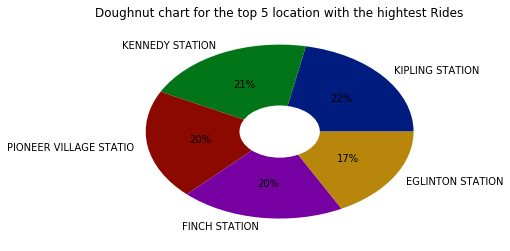

In [4]:
palette_color = sb.color_palette('dark')
plt.pie(top_5_location, labels=top_5_location_index,colors=palette_color, autopct='%.0f%%')

# draw circle
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title("Doughnut chart for the top 5 location with the hightest Rides")

In [5]:
# define a function that takes the index and values and plots a bar chart.
def index_value_extractor(data,a,b,c):
    '''this function takes four arguments, extract index and value. then plots a bar chart with the remaining parameters'''
    x = np.array(data.index)
    y = np.array(data.values)
    ''' next this will plot a bar chart with the index  and values'''
    plt.bar(x,y)
    ''' now use the arguments a,b and c to label the plot generated. '''
    plt.title(a)
    plt.xlabel(b)
    plt.ylabel(c)
    plt.xticks(rotation=90)
    plt.show()
    

# define parameters to be used for the function defined above.
x_label_1 = 'Locations'
y_label_1 = 'Counts'
title_1 = 'Counts Vs Location for top 10 Locations'    

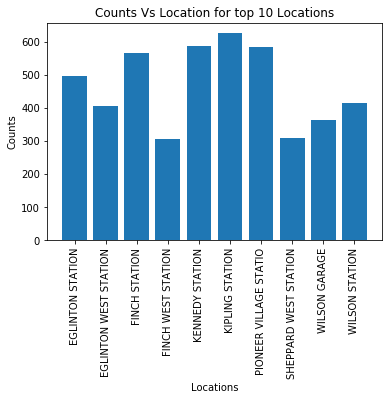

In [6]:
# create a bar plot for the top 10 frequent Locations.
top_10_location = df.Location.value_counts().head(10)
index_value_extractor(top_10_location,title_1,x_label_1,y_label_1)

From the figure above: 
* it is seen that Kipling Station has the highest frequency. 
* Also we can see others comming close to it. This might raise further questions if we want to drill deeper into these locations and find underlying patterns or insights.

### Now let's zoom in on days that had the longest hours of delay

In [7]:
# grouping the total delays in hours for days.
day_hours = df.groupby(['Day'])['Min Delay'].sum()/60

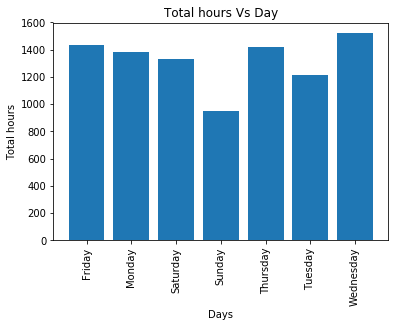

In [8]:
# plot the total hours against the days
index_value_extractor(day_hours,'Total hours Vs Day', 'Days', 'Total hours')

* Most days of th week had not so much difference in the delays compared to Sunday. Sunday has the least hours for delay for the bus ride. what could possible be the reason?

* After sunday, we have Tuesday and Saturday, as our next lowest days.

* So now, our week starts with Sunday, Sunday has the least. Then comes monday, it spikes a bit. By Tuesday it drops a bit,then peaks at Wednesday. When it's Thursday and Friday, we can't really see any significant difference in the total hours. But it drops a bit by Saturday and further drops to its lowest by Sunday.

* So the trend line suggests that towards the weekdays, there's more delays for our buses. But as we move towards the weekends, we notice some changes in delay times. Bus delays are lesser as for weekends eventhough the differences are not so large.

* This could be due to the fact that there's less activities over the weekends, and maybe on Sunday, Most residents would prefer to stay at home to bond with Family and rest.

### Reasons for Bus Delay

Next, we are interested in the reasons for delay. That means, we have to beam our search lights on the Incident column. We're trying to figure out the frequency of the reasons why the delay happened. 

In [9]:
# create a frequency distribution for the delay incidents
reasons_for_delay = df.Incident.value_counts()
# create parameters to be used for plotting
title = 'Frequency vs Reasons for Delay'
x_label = 'Reasons'
y_label = 'Freqency'

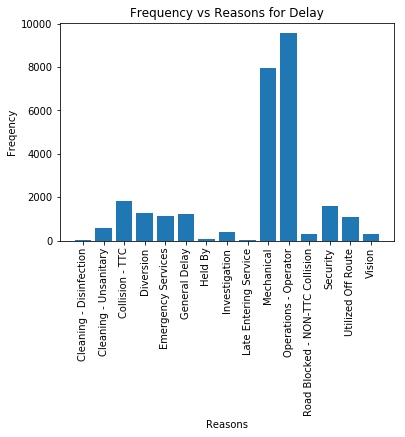

In [10]:
# plot the Incident distribution
index_value_extractor(reasons_for_delay,title, x_label, y_label)

### Looks like the operations- operator had the hightest reason for delay. What if we want to compare the delays with the total time, to know which variable spent the longest time in delay.

In [11]:
# total hours spent by each Incident
incident_hours = df.groupby(df['Incident'])['Min Delay'].sum()/60 # to convert the time to hours.

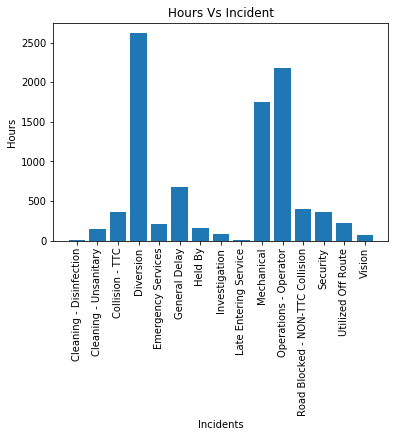

In [12]:
# plot Incident vs Hours using the function defined earlier.
index_value_extractor(incident_hours,'Hours Vs Incident', 'Incidents','Hours')

* Suprisingly, The plot above shows that delays that were caused due to diversions lasted longest among other reasons for the delay. 
* Comparing it with the previous plot, we discovered that the frequency of the delay caused by diversion was relatively low. 
* However, once they occurred, they lasted way longer than the ones that were caused by operarions-operators and Mechanical reasons.

### Let's narrow in on each Incident and its  Daily Distribution

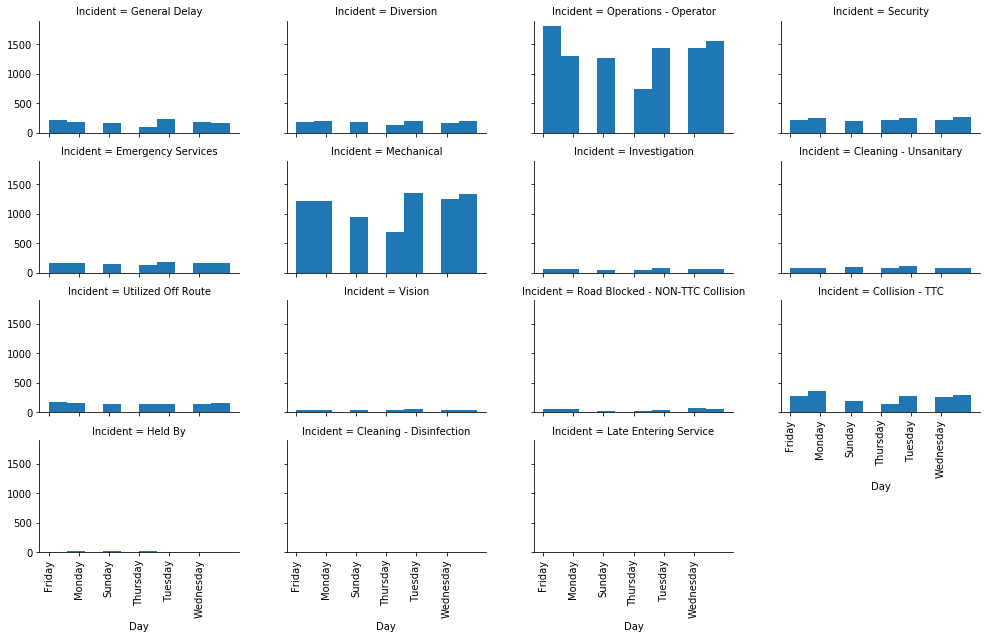

In [13]:
# Faceting
# here we plot the different incidents and the days.
g = sb.FacetGrid(data= df,col = 'Incident',col_wrap=4);
g.map(plt.hist, 'Day')
g.fig.set_size_inches(14, 8)
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()


For the previous plot, 
* it can be seen that we had more incident for Operations and Mechanical that occurred daily compared to the Frequency of Diversion. 
* Other Incidents had a relatively low occurrence. 
* Thus we can infer that the reason why Operations and Mechanical have a long hours of delay is due to the cummulative frequent occurrence of those events. 

## Incident Variable

### Let's Dive in a bit. Still focused on the Incident variable, let's see the minimum delay in minutes distribution for esch day for each of the Incidents.


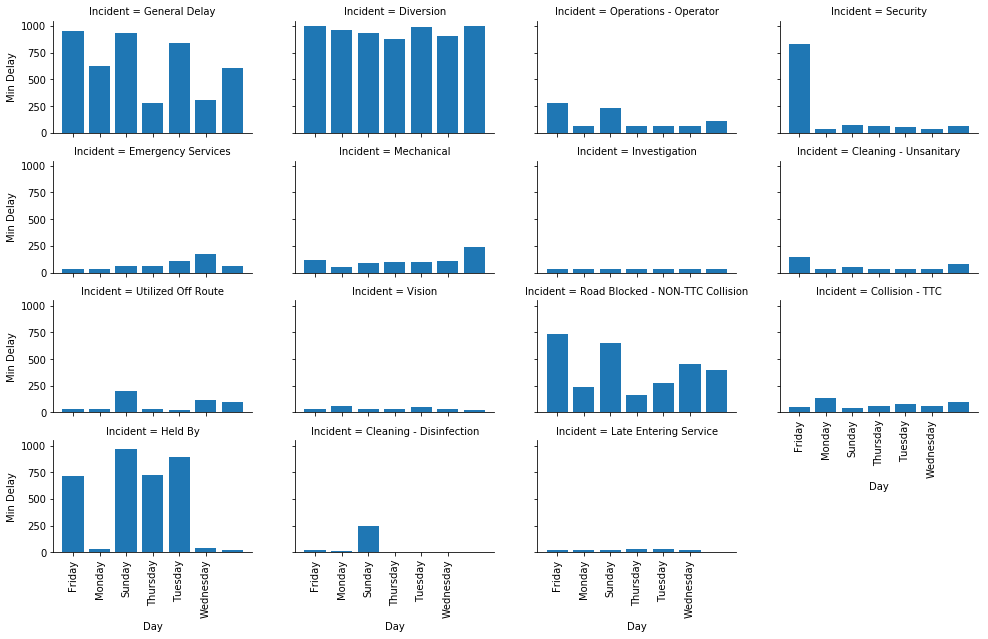

In [14]:
# Faceting plot showing the relationship for the daily incident and min delay.
g = sb.FacetGrid(data= df,col = 'Incident',col_wrap=4);
g.map(plt.bar, 'Day','Min Delay')
g.fig.set_size_inches(14, 8)
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels

### From the initial plot, we see that:
* General delay, Diversions road blocks and Held by had long hours of delay time. 
* Where as others had shorter time for the delays. Also we noticed that Diversion had longer time for all the days.
* Operation and Mechanical had shorter time for the days recorded. 

### Let's zero in on the Daily impact of the incidents.

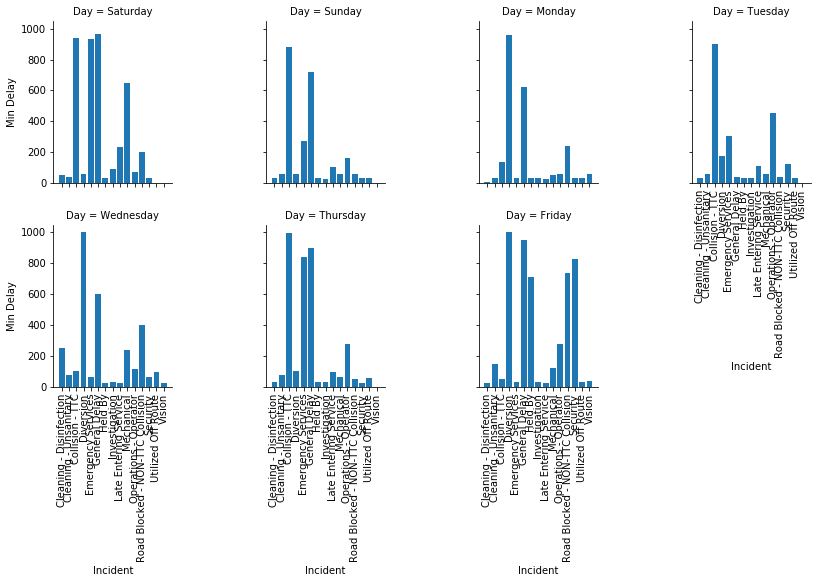

In [15]:
# Faceting daily plot for incident. 
g = sb.FacetGrid(data= df,col = 'Day',col_wrap=4);
g.map(plt.bar, 'Incident','Min Delay')
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    ax.set_xticklabels(labels, rotation=90) # set new labels
plt.show()

### For the Daily impact of incident on the Minimum Delay time, we have that:
* For Saturdays, Diversion and Operations were very low. Collision,General Delay and Emergency were among the top three highest.
* For Sundays, Collision was till high. General Delay and Emergency had dropped while others remained low.
* Monday had Diversions spiked to it peak, Emergency dropped so low and General Delay dropped a bit. Others remained low. Collision really dropped to a very low value.
* Tuesday had collision suddenly rise and Diversion dropped. We also see a rise in Operations.
* Wednesday, Diversion and General Delay rose, Collision dropped, Operations equally dropped slightly.
* Thursday, Diversion dropped significantly. Collision,General Delay and Emergency grew by a large factor.
* Friday, Diversion, General Delay, Held by, Road Blocked and Security were the highest. while others dropped and some remained low

## Conclusion and Recommendation.

* It Seen that there's a relationship with the Incident and the Min Delay time.
* Diversion Incident had a greater impact on Min Delay Time and occurred Less frequent.
* Operations and Mechanical had a more frequent occurrence during the week but they had a lower time for most times they occurred.
* Mondays, Wednesdays and Fridays had the highest delay time due to Diversion. Thus it is best to schedule important engagement at days other than these to avoid serious delay times.

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt